#### Introduction to Machine Learning with Python
Robert Palmere, 2021\
Email: rdp135@chem.rutgers.edu

This session provides a brief overview of machine learning (deep learning) in the context of anomaly detection.

References:

* Alla, S., & Adari, S. K. (2019). Beginning anomaly detection using python-based deep learning. USA: Apress.
* rbm.py [link](https://github.com/aaxwaz/Fraud-detection-using-deep-learning/tree/master/rbm)
* .csv data [link](https://www.kaggle.com/mlg-ulb/creditcardfraud)


We will implement the following models:

* Restricted Boltzmann Machine (RBM)
* Recurrent Neural Network (RNN)
* Convolutional Neural Network (CNN)


__Note__ : Using Python3.6 with Tensorflow 1.10.0 and Keras 2.2.4 - This is required for the local 'rbm.py' module.



#### Restricted Boltzmann Machine (RBM)

In [1]:
# Imports

import sys
import pandas as pd
import tensorflow as tf
from sklearn.metrics import roc_auc_score as auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from boltzmann_machines.rbm import *

/Users/rdp135/opt/miniconda3/envs/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/rdp135/opt/miniconda3/envs/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/rdp135/opt/miniconda3/envs/ml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/rdp135/opt/miniconda3/envs/ml/lib

In [2]:
# Read in data using pandas dataframe

df = pd.read_csv('creditcard.csv', sep=',', index_col=None)

df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [3]:
# Scale the data so that it is prepared for RBM

df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0
284806,1.642058,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0.514355,0


In [4]:
# Define the training and test data sets

x_train = df.iloc[:200_000, 1:-2].values
y_train = df.iloc[:200_000, -1].values

x_test = df.iloc[200_000:, 1:-2].values
y_test = df.iloc[200_000:, -1].values

print('Trainning Data Shapes:\n')
print(x_train.shape)
print(y_train.shape)

print('\nTesting Data Shapes:\n')
print(x_test.shape)
print(y_test.shape)

Trainning Data Shapes:

(200000, 28)
(200000,)

Testing Data Shapes:

(84807, 28)
(84807,)


In [7]:
# Define the RBM model class and parameters

model = RBM(x_train.shape[1], 10, visible_unit_type='gauss', main_dir='./', model_name='rbm_model.ckpt', gibbs_sampling_steps=4, learning_rate=0.001, momentum=0.95, batch_size=512, num_epochs=20, verbose=1)

Validation cost at step 0: 0.9797749
Validation cost at step 1: 0.8888676
Validation cost at step 2: 0.8623047
Validation cost at step 3: 0.8428186
Validation cost at step 4: 0.84018964
Validation cost at step 5: 0.8418614
Validation cost at step 6: 0.83996814
Validation cost at step 7: 0.84882796
Validation cost at step 8: 0.84767044
Validation cost at step 9: 0.8412775
Validation cost at step 10: 0.8465984
Validation cost at step 11: 0.8456086
Validation cost at step 12: 0.8426258
Validation cost at step 13: 0.84158844
Validation cost at step 14: 0.8435671
Validation cost at step 15: 0.84193176
Validation cost at step 16: 0.83808863
Validation cost at step 17: 0.8508711
Validation cost at step 18: 0.8458251
Validation cost at step 19: 0.8431612


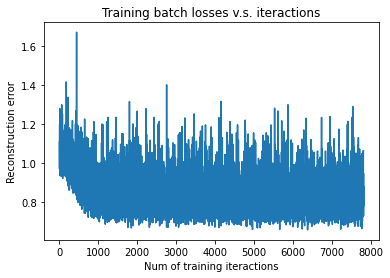

In [8]:
# Fit the model

model.fit(x_train, validation_set=x_test)

In [26]:
# Score the model using Area Under the Curve

costs = model.getFreeEnergy(x_test).reshape(-1) # Free energies

# Need to ensure that costs does not have any 'NaN' or 'inf' values for 'auc()' function.

print(np.isnan(costs).any()) # No NaNs
print(np.isinf(costs).any()) # inf values found

costs[costs == -np.inf] = 0

print(np.isinf(costs).any()) # np.inf replaced with 0

score = auc(y_test, costs)

print(f'AUC Score: {round(score*100, 3)}%') # >95% True Positive 

INFO:tensorflow:Restoring parameters from ./rbm_model.ckpt
False
True
False
AUC Score: 95.638%


In [28]:
# Find the maximum value to establish a range for looking for anomalies

anomaly = pd.DataFrame(costs[y_test == 1])
anomaly.describe() # Costs less than $250 should do

,0
count,107.000000
mean,87.909988
std,64.513023
min,-5.454095
25%,36.706861
50%,97.747063
75%,127.362133
max,231.340118


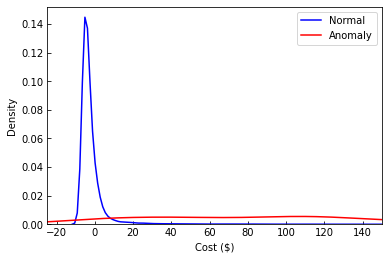

In [39]:
# Plot the data
import seaborn as sns

fig, ax = plt.subplots()

sns.kdeplot(costs[(y_test == 0) & (costs < 250)], ax=ax, color='b', label='Normal')
sns.kdeplot(costs[(y_test == 1) & (costs < 250)], ax=ax, color='r', label='Anomaly')
ax.set_xlabel('Cost ($)')
ax.set_xlim([-25, 150])
ax.tick_params(direction='in')
plt.legend(loc='upper right')
plt.show()

-----

#### Recurrent Neural Network (RNN)

In [40]:
df = pd.read_csv('nyc_taxi.csv', header=0, sep=',')

In [41]:
df.head()

,timestamp,value
0,7/1/14 0:00,10844
1,7/1/14 0:30,8127
2,7/1/14 1:00,6210
3,7/1/14 1:30,4656
4,7/1/14 2:00,3820


In [42]:
# Generate Datetime column

df['Datetime'] = pd.to_datetime(df['timestamp'])

df.head()

,timestamp,value,Datetime
0,7/1/14 0:00,10844,2014-07-01 00:00:00
1,7/1/14 0:30,8127,2014-07-01 00:30:00
2,7/1/14 1:00,6210,2014-07-01 01:00:00
3,7/1/14 1:30,4656,2014-07-01 01:30:00
4,7/1/14 2:00,3820,2014-07-01 02:00:00


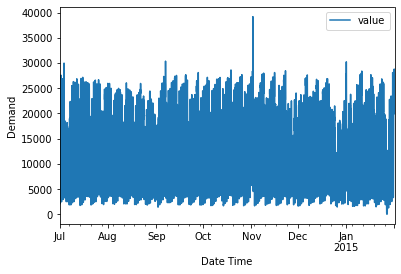

In [44]:
# Plot the Data

df.plot(x='Datetime', y='value')
plt.xlabel('Date Time')
plt.ylabel('Demand')
plt.show()

In [45]:
df.describe() # Wide range of values present in the data set

,value
count,10320.000000
mean,15137.569380
std,6939.495808
min,8.000000
25%,10262.000000
50%,16778.000000
75%,19838.750000
max,39197.000000


In [46]:
# Lets scale the data in preparation for RNN model

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_value'] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df['value'])), columns=['value'])

In [47]:
df.head() # Values scaled to span [0, 1]

,timestamp,value,Datetime,scaled_value
0,7/1/14 0:00,10844,2014-07-01 00:00:00,0.276506
1,7/1/14 0:30,8127,2014-07-01 00:30:00,0.207175
2,7/1/14 1:00,6210,2014-07-01 01:00:00,0.158259
3,7/1/14 1:30,4656,2014-07-01 01:30:00,0.118605
4,7/1/14 2:00,3820,2014-07-01 02:00:00,0.097272


In [54]:
# Using adam optimizer and mean squared error (MSE) as our loss function

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam

model = Sequential()
model.add(LSTM(units=32,
              activation='tanh',
              input_shape=(48, 1),
              return_sequences=True))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
             loss='mean_absolute_error',
             metrics=['mean_absolute_error'])

model.summary() # Helps with debugging

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 48, 32)            4352      
_________________________________________________________________
dense_1 (Dense)              (None, 48, 1)             33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [57]:
# We will split the data into subsets of 48 (30 mins / data point * 48 = 1 day)

sequence = np.array(df['scaled_value'])

trim = len(sequence) % 48
subsequence = int(len(sequence)/48)
trimmed = sequence[:len(sequence) - trim]

trimmed.shape = (subsequence, 48, 1)
trimmed.shape

(215, 48, 1)

In [58]:
# Now let's train the RNN model

model.fit(x=trimmed,
         y=trimmed,
         batch_size=32,
         epochs=20,
         verbose=1,
         validation_data=(trimmed, trimmed))

Train on 215 samples, validate on 215 samples
Epoch 1/20
215/215 [==============================] - 1s 6ms/step - loss: 0.1528 - mean_absolute_error: 0.1528 - val_loss: 0.1511 - val_mean_absolute_error: 0.1511
Epoch 2/20
215/215 [==============================] - 0s 1ms/step - loss: 0.1501 - mean_absolute_error: 0.1501 - val_loss: 0.1479 - val_mean_absolute_error: 0.1479
Epoch 3/20
215/215 [==============================] - 0s 1ms/step - loss: 0.1464 - mean_absolute_error: 0.1464 - val_loss: 0.1441 - val_mean_absolute_error: 0.1441
Epoch 4/20
215/215 [==============================] - 0s 1ms/step - loss: 0.1423 - mean_absolute_error: 0.1423 - val_loss: 0.1392 - val_mean_absolute_error: 0.1392
Epoch 5/20
215/215 [==============================] - 0s 1ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - val_loss: 0.1320 - val_mean_absolute_error: 0.1320
Epoch 6/20
215/215 [==============================] - 0s 1ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - val_loss: 0.1214 - va

In [63]:
# Now we apply the learned model to the 'testing' data (the same data in this case)

prediction = model.predict(x=trimmed)

In [64]:
# Score using the MSE

import math
from sklearn.metrics import mean_squared_error as mse

t1 = np.copy(trimmed).flatten()
t2 = np.copy(prediction).flatten()

rmse = math.sqrt(mse(t1, t2))
print(f'RMSE: {rmse}')

RMSE: 0.08173038781952152


In [182]:
# We then use what we have learned to determine a treshold value for determining what is to be considered an anomaly

import numpy as np

dist = np.linalg.norm(trimmed-prediction, axis=-1)

scores = np.copy(dist).flatten()

scores.sort()

cutoff = int(0.99999999 * len(scores))

threshold=scores[cutoff] # Anything above this value is considered an anomaly

print('Threshold value: %f' % threshold)

Threshold value: 0.650729


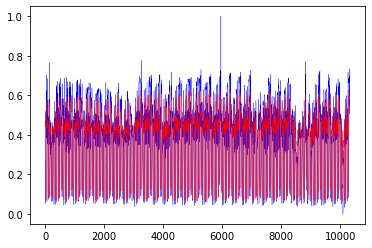

In [123]:
# Plot the prediction and original data together

fig, ax = plt.subplots()
ax.plot(t1, color='b')
ax.plot(t2, color='r', lw=0.3)
plt.show()

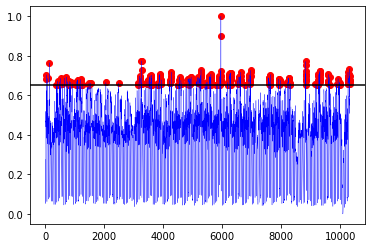

In [186]:
# Plot the anomalies over the original data

fig, ax = plt.subplots()
ax.plot(t1, 'b', lw=0.3)
ax.axhline(y=threshold, color='k')
thresh = [(n, i) for n, i in enumerate(t1) if i >= threshold]
indices = [i[0] for i in thresh]
vals = [i[1] for i in thresh]
ax.scatter(indices, vals, color='r')
plt.show()

----

#### Convolutional Neural Network (CNN)

In [187]:
# Read in credit card fraud data again

df = pd.read_csv('creditcard.csv', sep=',', index_col=None)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [188]:
# Scale the values in preparation for the CNN

df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0
284806,1.642058,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0.514355,0


In [189]:
# Set normal and anomalies

anomalies = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

anomalies.shape, normal.shape

((492, 31), (284315, 31))

In [208]:
# Define training and testing data sets

for f in range(0, 20):
    normal = normal.iloc[np.random.permutation(len(normal))]
    
data_set = pd.concat([normal[:2000], anomalies])

x_train, x_test = train_test_split(data_set, test_size=0.4, random_state=42)

x_train = x_train.sort_values(by=['Time'])
x_test = x_test.sort_values(by=['Time'])

y_train = x_train['Class']
y_test = x_test['Class']

x_train.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
320,-1.991655,-0.602483,0.479089,0.549750,-1.069814,-0.501687,0.214778,-0.139683,0.558440,-1.914257,...,0.433866,1.039252,-0.025035,-0.260748,-0.456975,-0.117581,-0.073710,0.055204,-0.182071,0
623,-1.986644,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
821,-1.983359,1.140247,0.020035,-0.271887,0.727194,0.430336,0.497869,0.033986,0.153375,-0.101362,...,0.053309,0.054195,-0.263415,-1.153271,0.698028,-0.246912,0.010566,0.002426,-0.129337,0
856,-1.982895,-0.440732,1.032815,1.367832,-0.055192,0.156301,-0.301038,0.539671,0.203222,-0.660625,...,-0.171483,-0.431693,0.031401,0.170349,-0.293095,0.071746,0.257613,0.086598,-0.333439,0
897,-1.982327,-0.371028,0.163148,2.731392,0.731217,-0.321304,0.840124,0.275887,-0.392287,1.670333,...,-0.343092,0.115927,-0.320990,-0.024246,-0.105633,0.381022,-0.400358,-0.559607,-0.224731,0
1330,-1.974662,0.892379,-0.345991,0.051280,0.741072,-0.452616,-0.724437,0.415932,-0.215842,-0.235292,...,0.108916,0.080448,-0.254846,0.638831,0.568469,0.503576,-0.083778,0.024184,0.338440,0
1634,-1.969945,1.082193,0.145852,0.507509,1.334228,-0.175604,0.033090,0.011401,0.094161,-0.036260,...,-0.024671,0.116008,-0.065536,0.242315,0.612356,-0.344849,0.036191,0.010828,-0.267191,0
1719,-1.968534,-0.695350,-0.973853,2.452479,-0.676376,-0.126656,-0.240814,-0.878516,-0.105118,-0.744281,...,0.453279,1.585425,-0.303820,0.263144,-0.638176,-0.035985,-0.180979,-0.324253,-0.297296,0
1757,-1.968028,0.817890,-1.103149,0.777374,0.158437,-1.080194,0.626879,-0.703740,0.392162,1.145526,...,-0.088037,-0.445074,-0.077474,-0.248966,-0.030307,0.961000,-0.062414,0.024361,0.363068,0
1883,-1.965986,1.211189,0.013053,0.955714,1.139326,-0.494405,0.294584,-0.512568,0.089641,0.807282,...,-0.106273,-0.050232,-0.120294,-0.432069,0.557992,-0.359828,0.077476,0.031829,-0.313289,0


In [209]:
# Define the Temporal Convolutional Network Layers

from keras import regularizers
from keras.layers import Dense, Input, Dropout, Embedding, LSTM
from keras.layers import Conv1D, Flatten, Activation, SpatialDropout1D
from keras.utils import to_categorical
from keras import Model

input_shape = (x_train.shape[1], 1)
input_layer = Input(shape=(input_shape))

# Layers with increasing dilations using powers of 2

conv_1 = Conv1D(filters=128,
               kernel_size=2,
               dilation_rate=1,
               strides=1,
                padding='causal',
               input_shape=input_shape,
               kernel_regularizer=regularizers.l2(0.01),
               activation='relu')(input_layer)

drop_1 = SpatialDropout1D(0.05)(conv_1)

conv_2 = Conv1D(filters=128,
               kernel_size=2,
               dilation_rate=2,
               strides=1,
                padding='causal',
               input_shape=input_shape,
               kernel_regularizer=regularizers.l2(0.01),
               activation='relu')(drop_1)

drop_2 = SpatialDropout1D(0.05)(conv_2)

conv_3 = Conv1D(filters=128,
               kernel_size=2,
               dilation_rate=4,
               strides=1,
                padding='causal',
               input_shape=input_shape,
               kernel_regularizer=regularizers.l2(0.01),
               activation='relu')(drop_2)

drop_3 = SpatialDropout1D(0.05)(conv_3)

conv_4 = Conv1D(filters=128,
               kernel_size=2,
               dilation_rate=8,
               strides=1,
                padding='causal',
               input_shape=input_shape,
               kernel_regularizer=regularizers.l2(0.01),
               activation='relu')(drop_3)

drop_4 = SpatialDropout1D(0.05)(conv_4)

In [210]:
# We flatten the last layer as the final output layer

flat = Flatten()(drop_4)

output_layer = Dense(2, activation='softmax')(flat)

TCN = Model(inputs=input_layer, outputs=output_layer)

In [211]:
# 'Compile' the model and check the summary

from keras.losses import categorical_crossentropy

TCN.compile(loss=categorical_crossentropy, optimizer=Adam(lr=0.002), metrics=['mae', 'accuracy'])

TCN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 31, 1)             0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 31, 128)           384       
_________________________________________________________________
spatial_dropout1d_17 (Spatia (None, 31, 128)           0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 31, 128)           32896     
_________________________________________________________________
spatial_dropout1d_18 (Spatia (None, 31, 128)           0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 31, 128)           32896     
_________________________________________________________________
spatial_dropout1d_19 (Spatia (None, 31, 128)           0         
__________

In [218]:
from keras.utils import to_categorical

x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)

input_shape = (x_train.shape[1], 1)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)


In [219]:
# Apply the CNN


TCN.fit(x_train, y_train, batch_size=128, epochs=25, verbose=1, validation_data=(x_test, y_test))

Train on 1495 samples, validate on 997 samples
Epoch 1/25
1495/1495 [==============================] - 3s 2ms/step - loss: 3.4481 - mean_absolute_error: 0.2620 - acc: 0.9097 - val_loss: 2.3833 - val_mean_absolute_error: 0.0590 - val_acc: 0.9619
Epoch 2/25
1495/1495 [==============================] - 1s 899us/step - loss: 1.8552 - mean_absolute_error: 0.0564 - acc: 0.9659 - val_loss: 1.3139 - val_mean_absolute_error: 0.0455 - val_acc: 0.9629
Epoch 3/25
1495/1495 [==============================] - 1s 780us/step - loss: 0.9952 - mean_absolute_error: 0.0625 - acc: 0.9659 - val_loss: 0.7225 - val_mean_absolute_error: 0.0595 - val_acc: 0.9619
Epoch 4/25
1495/1495 [==============================] - 2s 2ms/step - loss: 0.5566 - mean_absolute_error: 0.0668 - acc: 0.9679 - val_loss: 0.4315 - val_mean_absolute_error: 0.0575 - val_acc: 0.9609
Epoch 5/25
1495/1495 [==============================] - 2s 1ms/step - loss: 0.3474 - mean_absolute_error: 0.0610 - acc: 0.9672 - val_loss: 0.2933 - val_mean_

In [254]:
# Predict and score using AUC

from sklearn.metrics import roc_auc_score

preds = TCN.predict(x_test)
y_pred = np.round(preds)

auc = roc_auc_score(y_pred, y_test)

print('AUC Score: {}'.format(auc))

AUC Score: 0.9794578052215361


<AxesSubplot:>

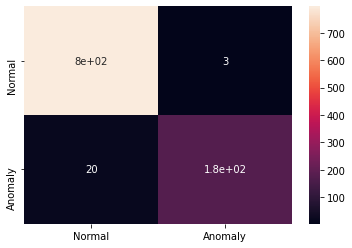

In [264]:
# Plot the results

from sklearn.metrics import confusion_matrix

y_pred2 = np.argmax(y_pred, axis=1)
y_test2 = np.argmax(y_test, axis=1)

mat = confusion_matrix(y_test2, y_pred2)

sns.heatmap(mat, xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'], annot=True)